In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
import tensorflow as tf

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate

<div> 
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information. 

2. Sex: Indicates someone's gender. 

3. GeneralHealth: Describes someone's overall health condition. 

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition. 

6. LastCheckupTime: Contains the information of the last health check 

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health. 

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not. 

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not. 

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not. 

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not 

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not. 

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not. 

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not. 

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not. 

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not. 

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity. 

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual. 

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not. 

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not. 

39. HighRiskLastYear: Stores information about whether someone was in high risk or not. 

40. CovidPos: Stores information about whether someone had Covid or not. 

# 1. Loading the CSV format dataset from SparkSQL

In [2]:
# Load the data into a Pandas DataFrame
df1 = pd.read_csv("Resources/heart_2022_Spark.csv")
# Display sample data
df1.head()

,State,Sex,Age,Race,BMI,Height,Weight,GenHealth,PhysicalHealth,MentalHealth,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,1.60,68.04,Excellent,0.0,0.0,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
1,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,1.57,63.50,Very good,2.0,3.0,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,1.57,53.98,Fair,2.0,0.0,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
3,Alabama,Male,Age 80 or older,"White only, Non-Hispanic",26.08,1.80,84.82,Poor,1.0,0.0,...,Never used e-cigarettes in my entire life,No,Yes,No,Yes,No,No,No,No,Yes
4,Alabama,Female,Age 80 or older,"Black only, Non-Hispanic",22.96,1.65,62.60,Very good,0.0,0.0,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No


<div> 
<h3 style="font-size: 22px; font-weight: bold; color: green ; margin-bottom: 10px;"> Understanding the Reduced Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information. 

2. Sex: Indicates someone's gender. 

3. GenHealth: Describes someone's overall health condition. 

4. PhysicalHealth: Describes someone's physical health condition.

5. MentalHealth: Indicates someone's mental health condition. 

6. PhysicalActivity: Indicates how active someone is in physical activities.

7. SleepHours: Someone's sleep time, which could be an indicator of sleep health. 

8. HeartAttack: This column stores information about whether someone has heart disease or not. 

9. Angina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

10. Stroke: Contains information about whether someone has had a stroke or not. 

11. Asthma: Stores information about whether someone has asthma or not.

12. SkinCancer: Stores information about whether someone has skin cancer or not. 

13. Depressed: Stores information about whether someone has depressive disorder or not 

14. KidneyDisease: Contains information about whether someone has kidney disease or not. 

15. Diabetes: Stores information about whether someone has diabetes or not. 

16. DiffWalking: Stores information about whether someone has difficulty walking or not.

17. Smoking: Stores information about whether someone smokes or not.

18. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not. 

19. ChestScan: Stores information about whether someone had chest scanned or not.

20. Race: Stores information about someone's race or ethnicity. 

21. Age: Groups someone's age into specific categories.

22. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual. 

23. Drinking: Information about whether someone consumes alcohol or not.

24. Height: Stores information about someone's height

25. Weight: Stores information about someone's weight

# 2. Exploring the Dataset

<Axes: >

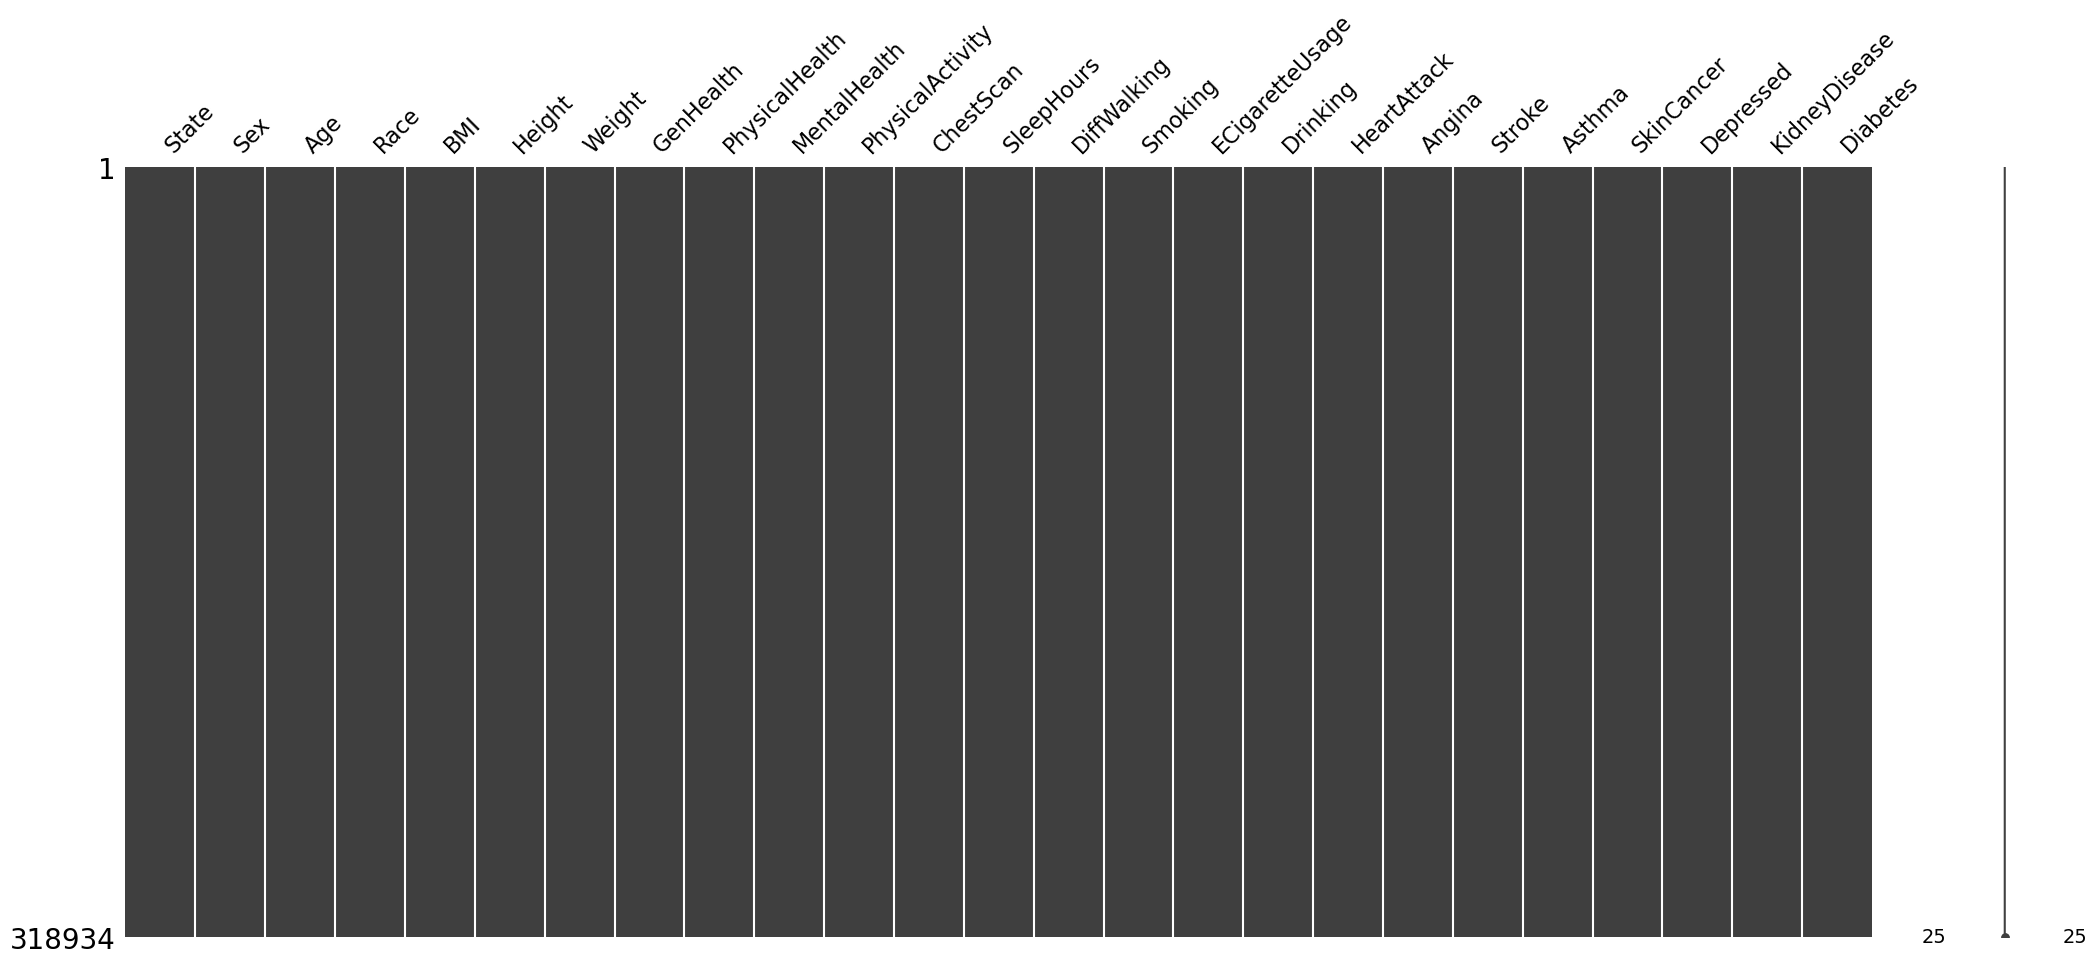

In [3]:
# Check he missing data
%matplotlib inline
msno.matrix(df1)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318934 entries, 0 to 318933
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             318934 non-null  object 
 1   Sex               318934 non-null  object 
 2   Age               318934 non-null  object 
 3   Race              318934 non-null  object 
 4   BMI               318934 non-null  float64
 5   Height            318934 non-null  float64
 6   Weight            318934 non-null  float64
 7   GenHealth         318934 non-null  object 
 8   PhysicalHealth    318934 non-null  float64
 9   MentalHealth      318934 non-null  float64
 10  PhysicalActivity  318934 non-null  object 
 11  ChestScan         318934 non-null  object 
 12  SleepHours        318934 non-null  float64
 13  DiffWalking       318934 non-null  object 
 14  Smoking           318934 non-null  object 
 15  ECigaretteUsage   318934 non-null  object 
 16  Drinking          31

In [5]:
# Statistical Analysis for numerical data in dataset
print(f"Summary of the Dataset with Numerical Columns")
df1.describe()

Summary of the Dataset with Numerical Columns


,BMI,Height,Weight,PhysicalHealth,MentalHealth,SleepHours
count,318934.000000,318934.000000,318934.000000,318934.000000,318934.000000,318934.000000
mean,28.569810,1.706211,83.432019,4.147623,4.317056,7.022124
std,6.515561,0.106798,21.340168,8.433649,8.227399,1.443645
min,12.020000,0.910000,22.680000,0.000000,0.000000,1.000000
25%,24.190000,1.630000,68.040000,0.000000,0.000000,6.000000
50%,27.440000,1.700000,81.650000,0.000000,0.000000,7.000000
75%,31.750000,1.780000,95.250000,3.000000,5.000000,8.000000
max,97.650000,2.410000,292.570000,30.000000,30.000000,24.000000


In [6]:
# All data including object/category columns
df1.describe(include="object")

,State,Sex,Age,Race,GenHealth,PhysicalActivity,ChestScan,DiffWalking,Smoking,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
count,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934,318934
unique,54,2,13,5,5,2,2,2,4,4,2,2,2,2,2,2,2,2,4
top,Washington,Female,Age 65 to 69,"White only, Non-Hispanic",Very good,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
freq,19038,163415,34887,241141,112207,247720,185311,272514,192473,243701,176150,301988,300017,306083,271267,292644,252223,304765,266742


In [7]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df1.describe(include="object").columns:
    print(f"Column Name: {col} with {len(df1[col].unique())} distinct values")
    print(df1[col].unique())
    print("____________________________________")

Column Name: State with 54 distinct values
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
____________________________________
Column Name: Sex with 2 distinct values
['Female' 'Male']
____________________________________
Column Name: Age with 13 distinct values
['Age 80 or older' 'Age 55 to 59' 'Age 40 to 44' 'Age 65 to 69'
 'Age 70 to 74' 'Age 60 to 64' 'Age 75 to 79' 'Age 50 to 54'
 'Age 45 to 49'

* Because, some categorical attributes are overlapping --> So, we further cleaning

In [8]:
# Check the "Race" category
unique_race = df1["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         241141
Hispanic                          29942
Black only, Non-Hispanic          24334
Other race only, Non-Hispanic     16251
Multiracial, Non-Hispanic          7266
Name: count, dtype: int64


In [9]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df1["Race"] = df1["Race"].replace(rename_race)
print(df1["Race"].value_counts())

Race
White          241141
Hispanic        29942
Black           24334
Other           16251
Multiracial      7266
Name: count, dtype: int64


In [10]:
# Check the "Age" category
print(df1["Age"].value_counts())

Age
Age 65 to 69       34887
Age 60 to 64       32886
Age 70 to 74       31748
Age 55 to 59       27413
Age 50 to 54       25026
Age 80 or older    23448
Age 75 to 79       23054
Age 40 to 44       22339
Age 45 to 49       21293
Age 35 to 39       21157
Age 18 to 24       20312
Age 30 to 34       18892
Age 25 to 29       16479
Name: count, dtype: int64


In [11]:
df1["Age"] = (df1["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df1["Age"].value_counts())

Age
65-69          34887
60-64          32886
70-74          31748
55-59          27413
50-54          25026
80 or older    23448
75-79          23054
40-44          22339
45-49          21293
35-39          21157
18-24          20312
30-34          18892
25-29          16479
Name: count, dtype: int64


In [12]:
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                                         266742
Yes                                         42434
No, pre-diabetes or borderline diabetes      7109
Yes, but only during pregnancy (female)      2649
Name: count, dtype: int64


In [13]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df1["Diabetes"] = df1["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                         266742
Yes                         42434
No, borderline diabetes      7109
Yes, during pregnancy        2649
Name: count, dtype: int64


# 3. Exploratory Data Analysis (EDA)

In [14]:
# Find numeric columns
num_cols= df1.select_dtypes(include=["number"]).columns.tolist()
num_cols

['BMI', 'Height', 'Weight', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

In [15]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## 3.1. One-Variable Analysis

### 3.1.1. Numerical Features

Analysis for BMI columns:
Analysis for Height columns:
Analysis for Weight columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


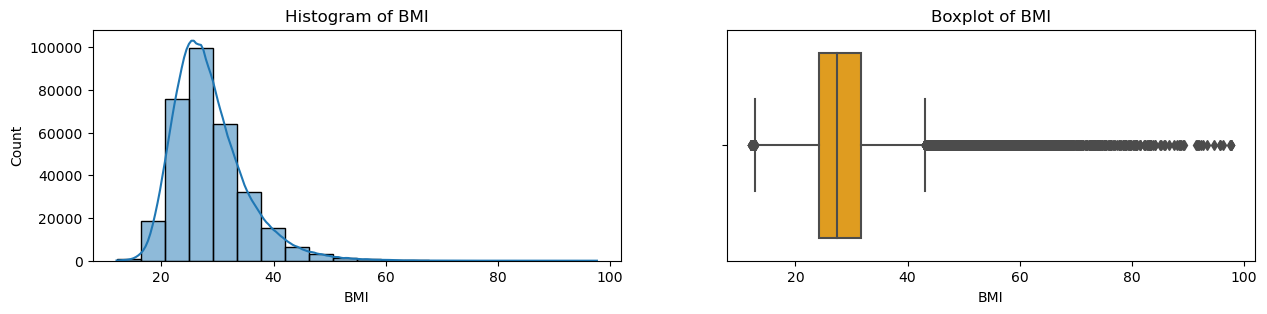

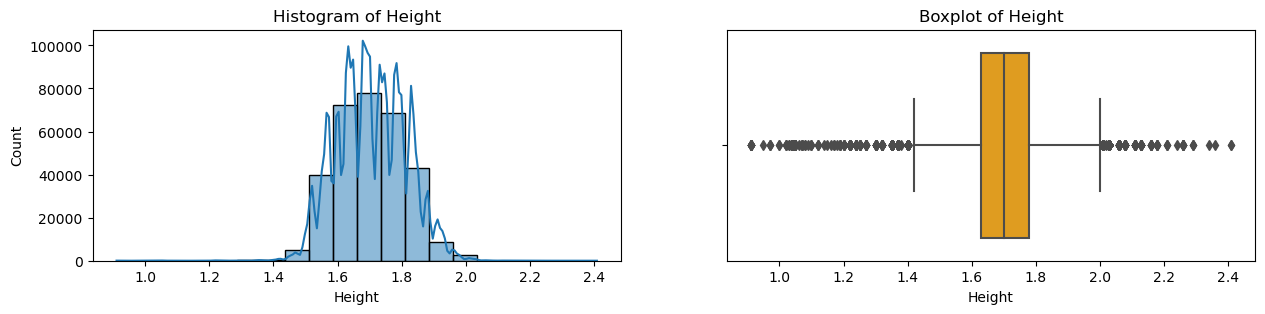

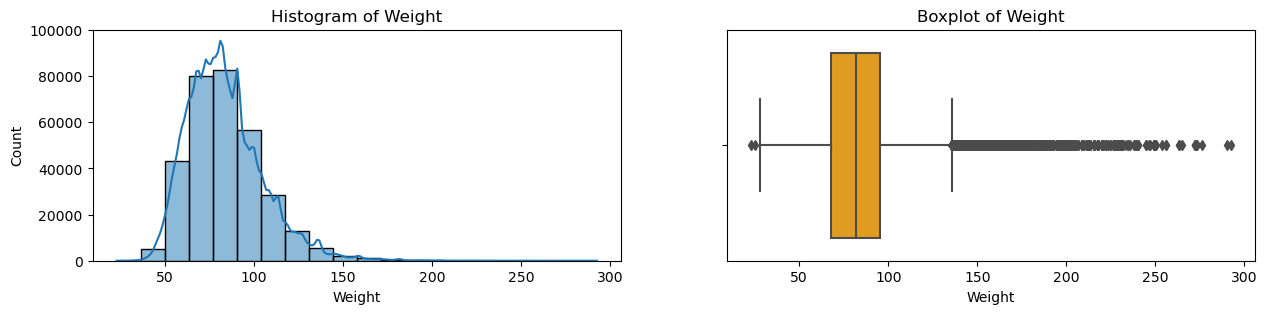

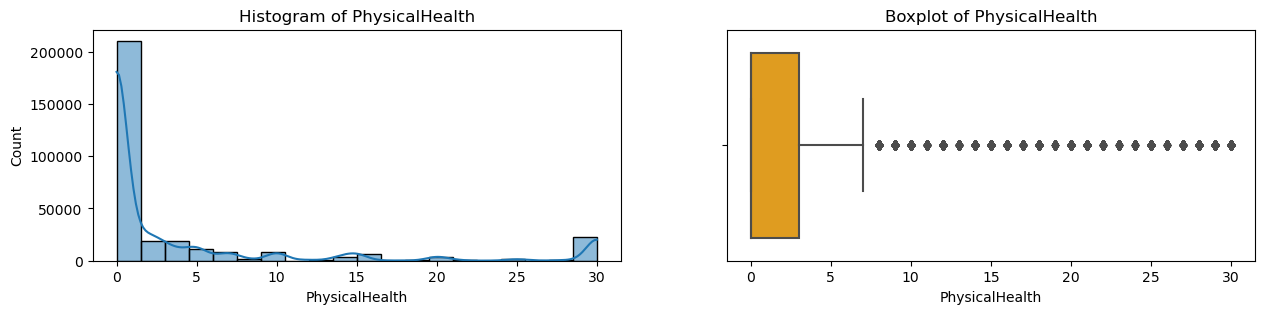

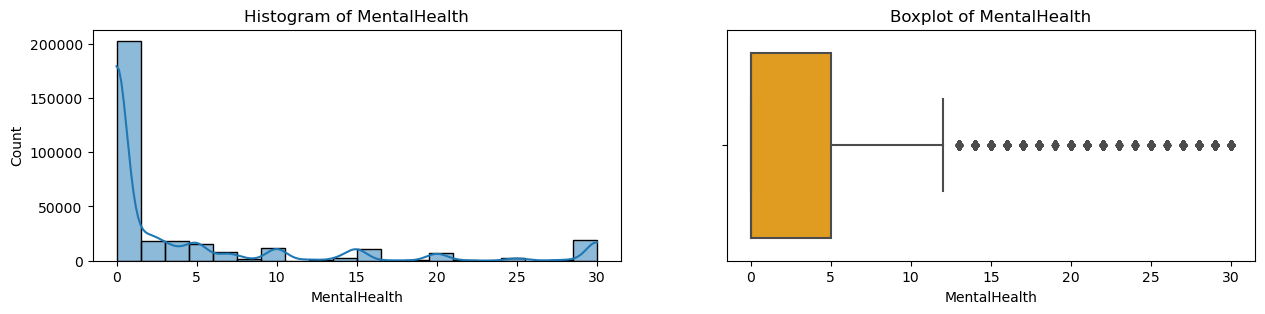

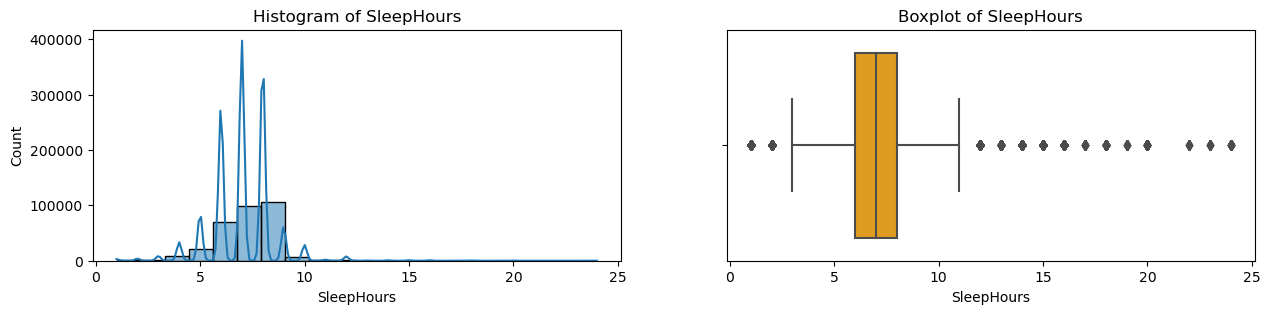

In [16]:
# Define Analysis function of numerical columns
def analysis_num(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    
    sns.histplot(df1[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df1[col], color="orange", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num(col)

#### How many outliers in each numerical feature?

In [17]:
# Define a function to count number of outlier data
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    return ((data < lower_bound) | (data > upper_bound)).sum()

# Call count outlier function for each numerical fearture
for col in num_cols:
    print(f"Number of outliers in {col}: {count_outliers(df1[col])}")

Number of outliers in BMI: 9928
Number of outliers in Height: 1099
Number of outliers in Weight: 7670
Number of outliers in PhysicalHealth: 50568
Number of outliers in MentalHealth: 43123
Number of outliers in SleepHours: 4534


### 3.1.2. Categorical Features

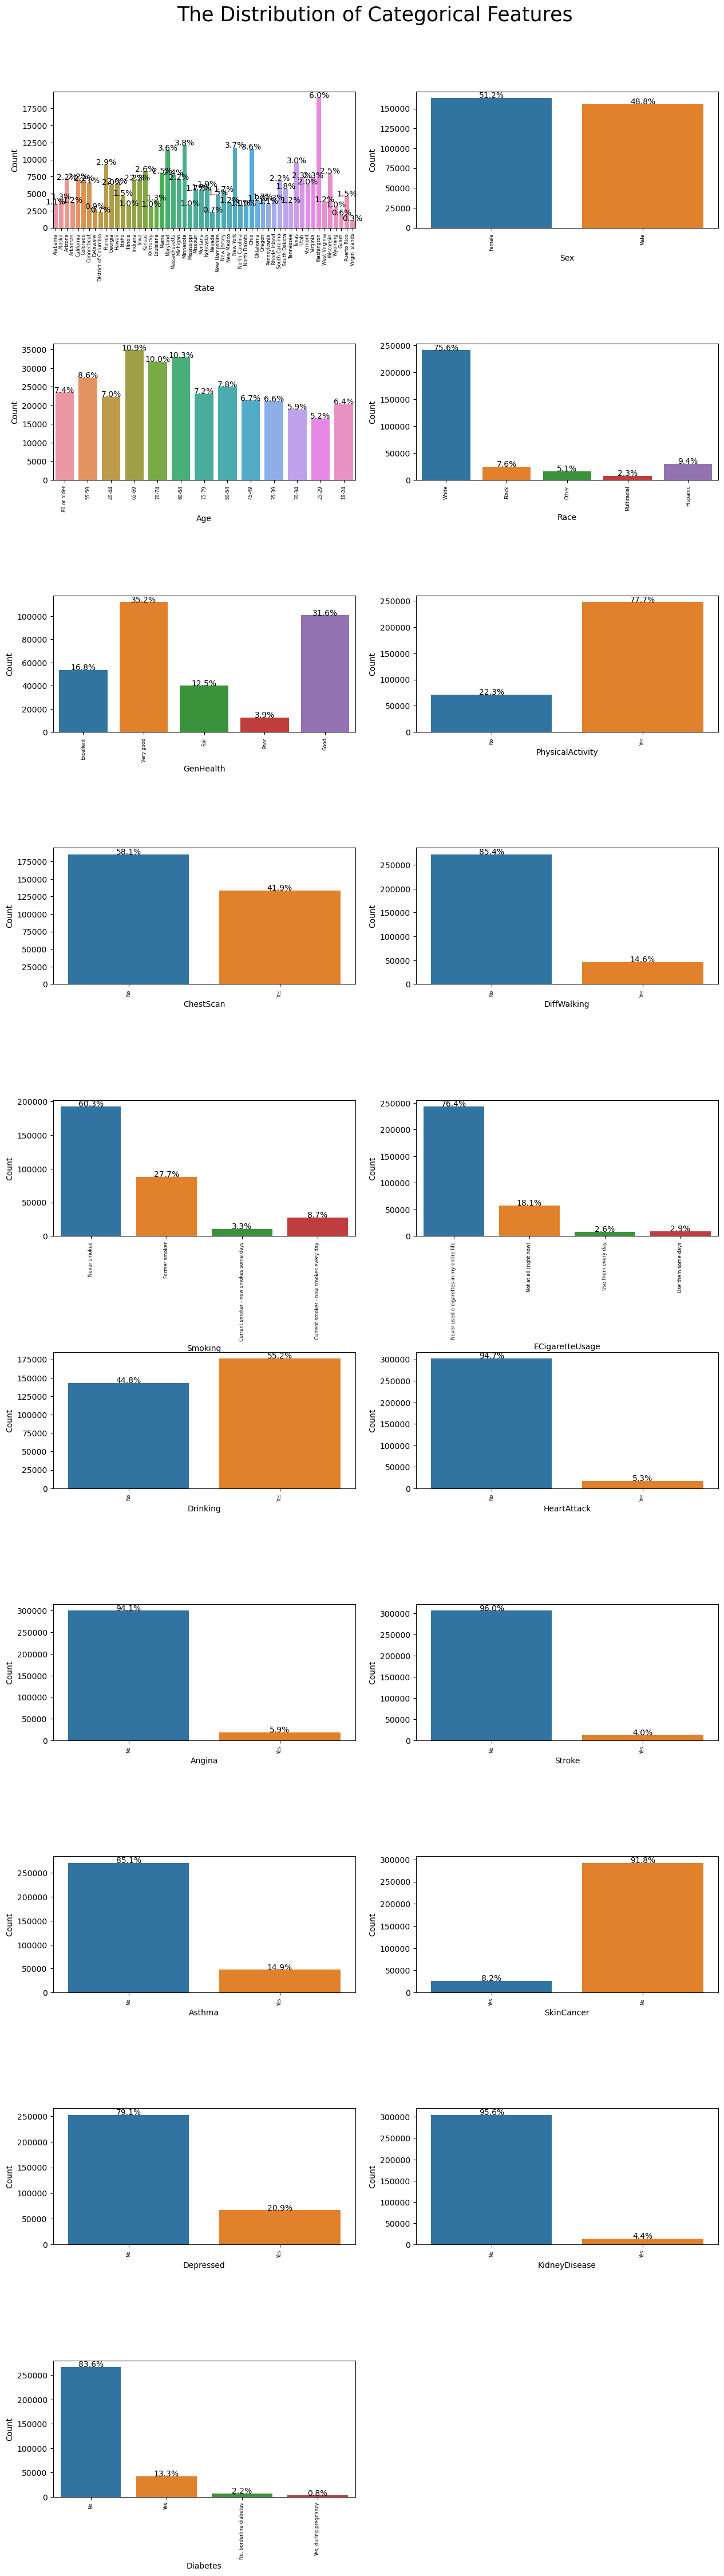

In [18]:
# Determin the number of rows and columns
L = len(cat_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(cat_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")
# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Categorical Features', fontsize=25)
plt.show()

* Replot "Distribution by Age Groups" in ascending order

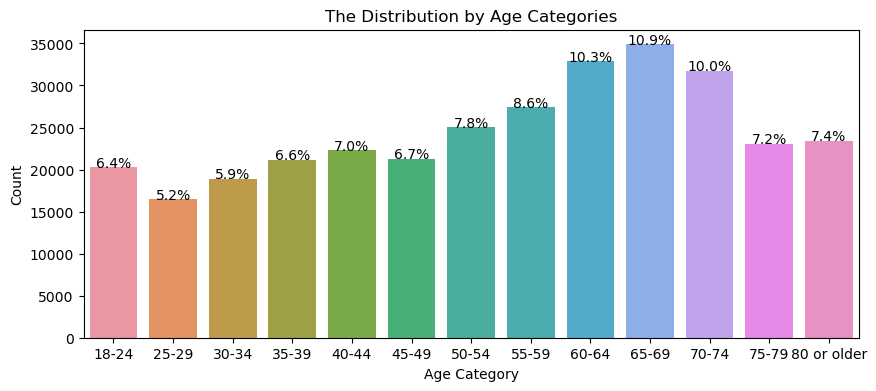

In [19]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df1, 
    x="Age", 
    order = sorted(df1["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "The Distribution by Age Categories"
)

# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Overall Distribution of Heart Attack

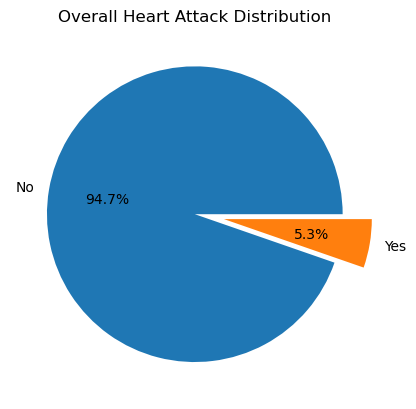

In [20]:
# Heart Attack distribution
heart_attack_rate = df1["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values, 
    labels = heart_attack_rate.index,
    autopct = "%.1f%%", 
    explode = [0, 0.2]
    )
plt.title("Overall Heart Attack Distribution")
plt.show()

## 3.2. Two-Variables Analysis

### 3.2.1 Analysis by Numerical Features

Analysis for BMI columns:
Analysis for Height columns:
Analysis for Weight columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


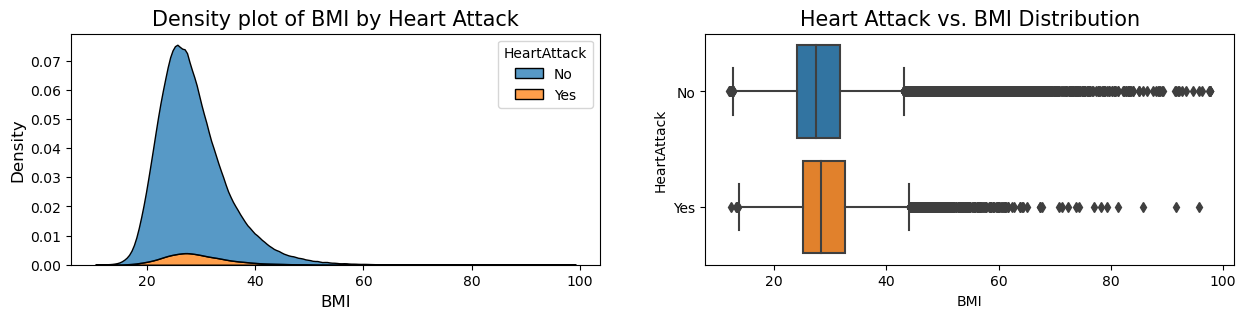

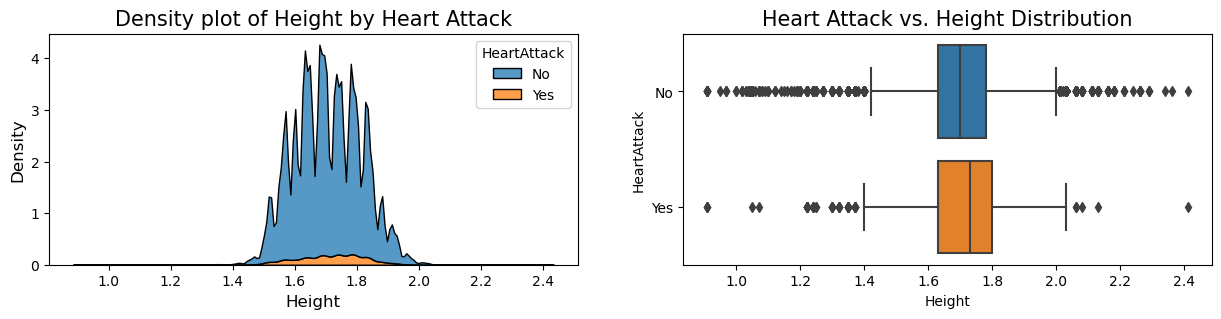

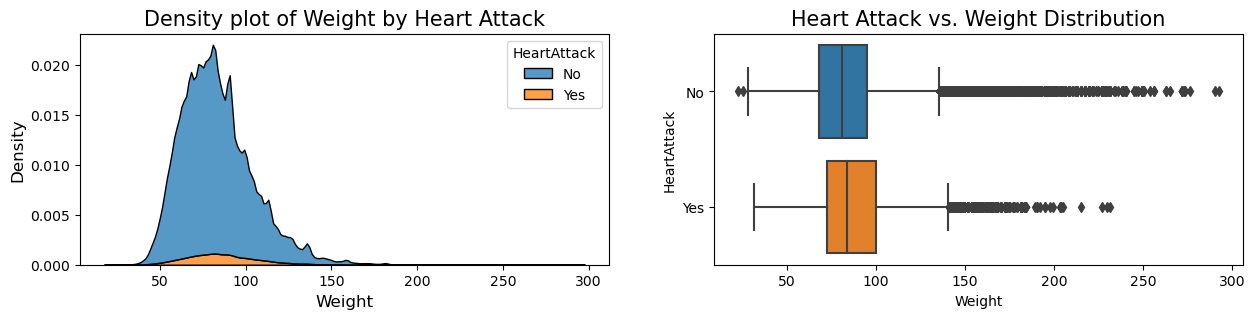

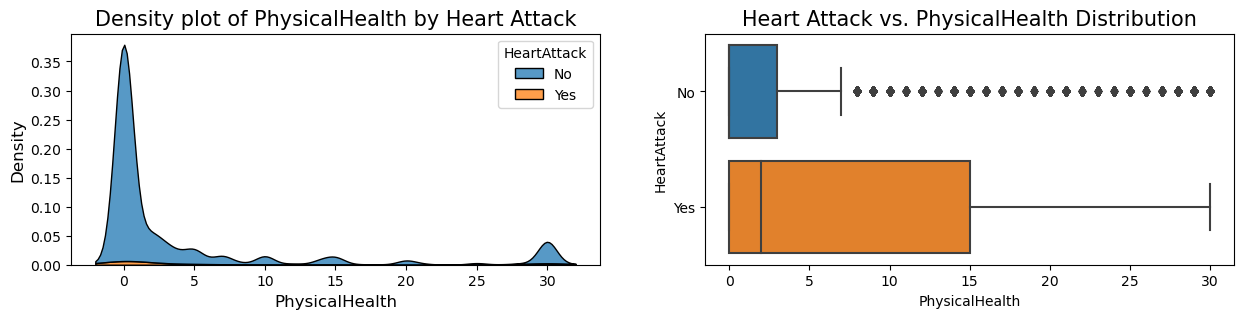

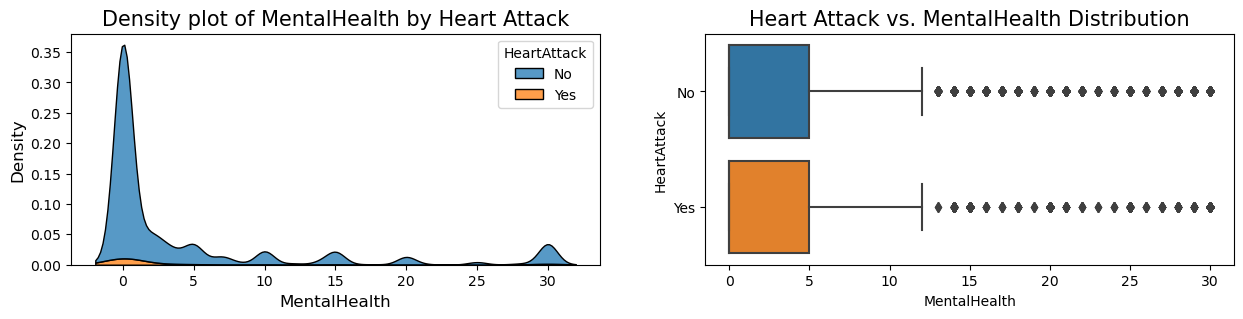

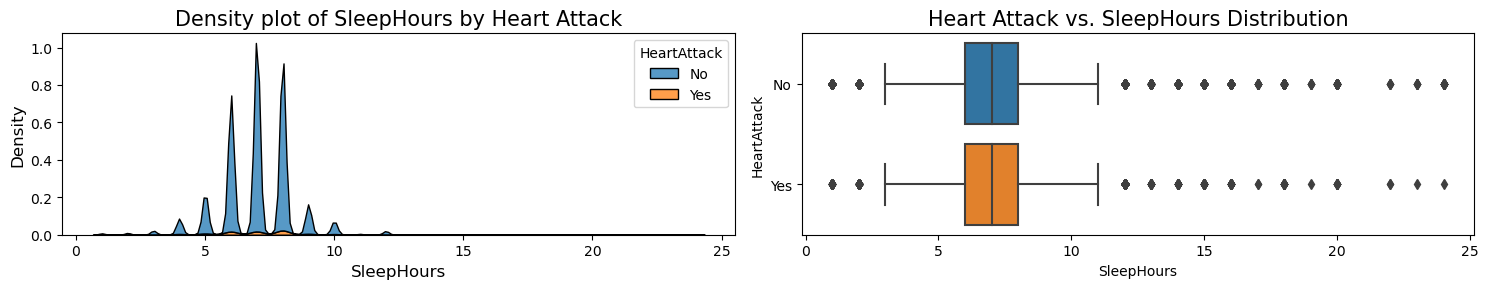

In [21]:
# Define Analysis function of numerical columns
def analysis_num_2(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    
    # KDE Plot
    sns.kdeplot(data=df1, x=col, hue="HeartAttack", multiple="stack", ax=ax[0])
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    ax[0].set_title(f"Density plot of {col} by Heart Attack", fontsize=15)

    # Boxplot
    sns.boxplot(data=df1, x=col, y="HeartAttack", ax=ax[1])
    ax[1].set_title(f"Heart Attack vs. {col} Distribution", fontsize=15)

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num_2(col)
    
plt.tight_layout()
plt.show()

### 3.2.2 Analysis by Categorical Features

### Heart Attack Among Genders

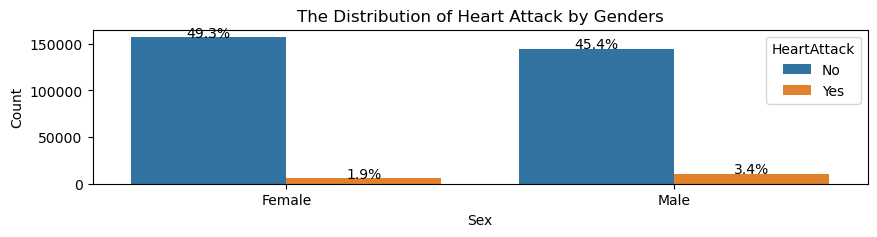

In [22]:
# Set figure styles
plt.figure(figsize=(10,2))

#Plot countplot
ax = sns.countplot(data=df1, x="Sex", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "The Distribution of Heart Attack by Genders"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by States

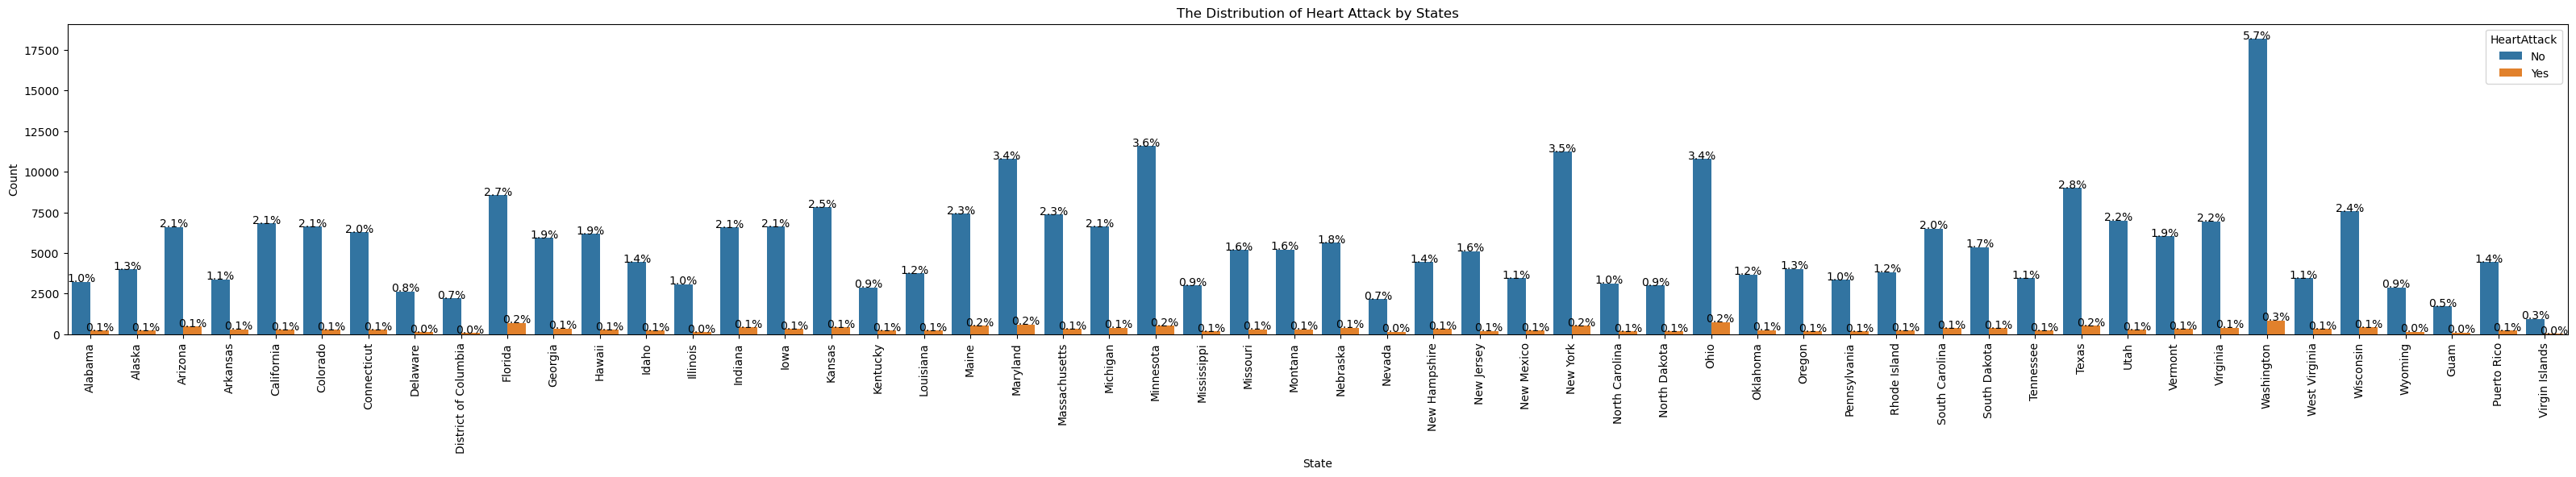

In [23]:
# Set figure styles
plt.figure(figsize=(40,5))

#Plot countplot
ax = sns.countplot(data=df1, x="State", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "The Distribution of Heart Attack by States"
)
ax.tick_params(axis='x', rotation=90, labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Age Groups

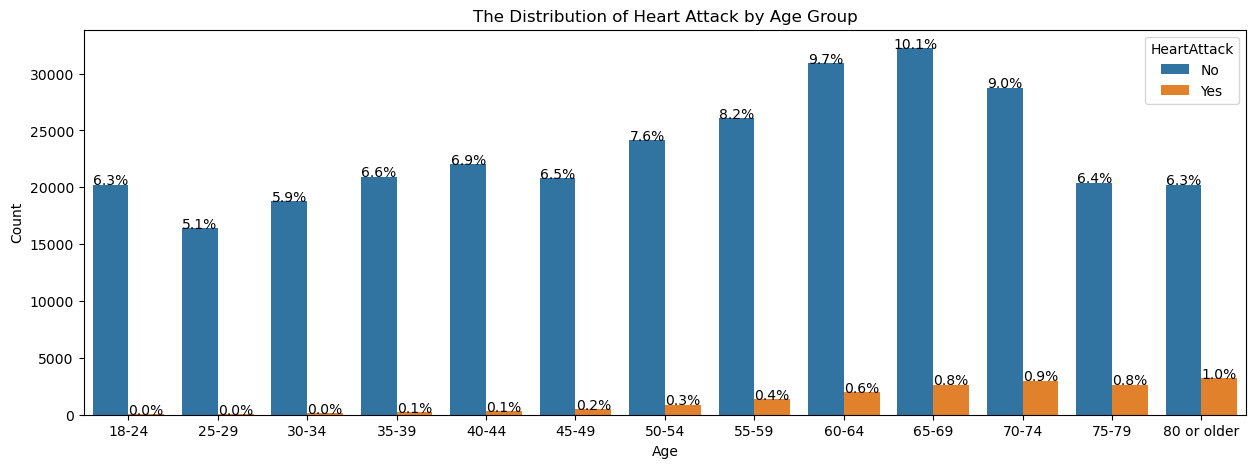

In [24]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Age", hue="HeartAttack", order = sorted(df1["Age"].unique()))

# Customize plot
ax.set(
    ylabel = "Count",
    title = "The Distribution of Heart Attack by Age Group"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Race

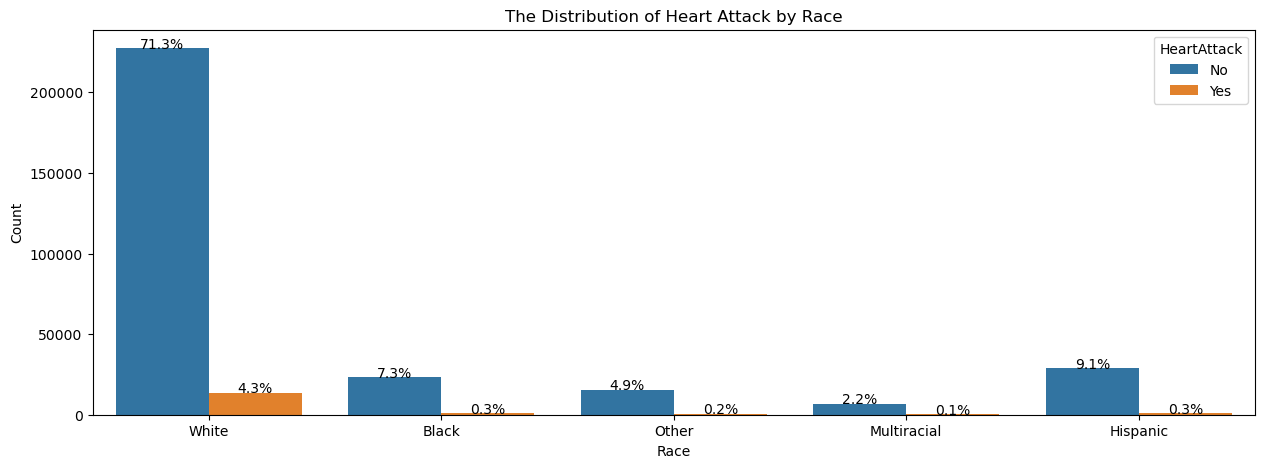

In [25]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Race", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "The Distribution of Heart Attack by Race"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Other Categorical Features

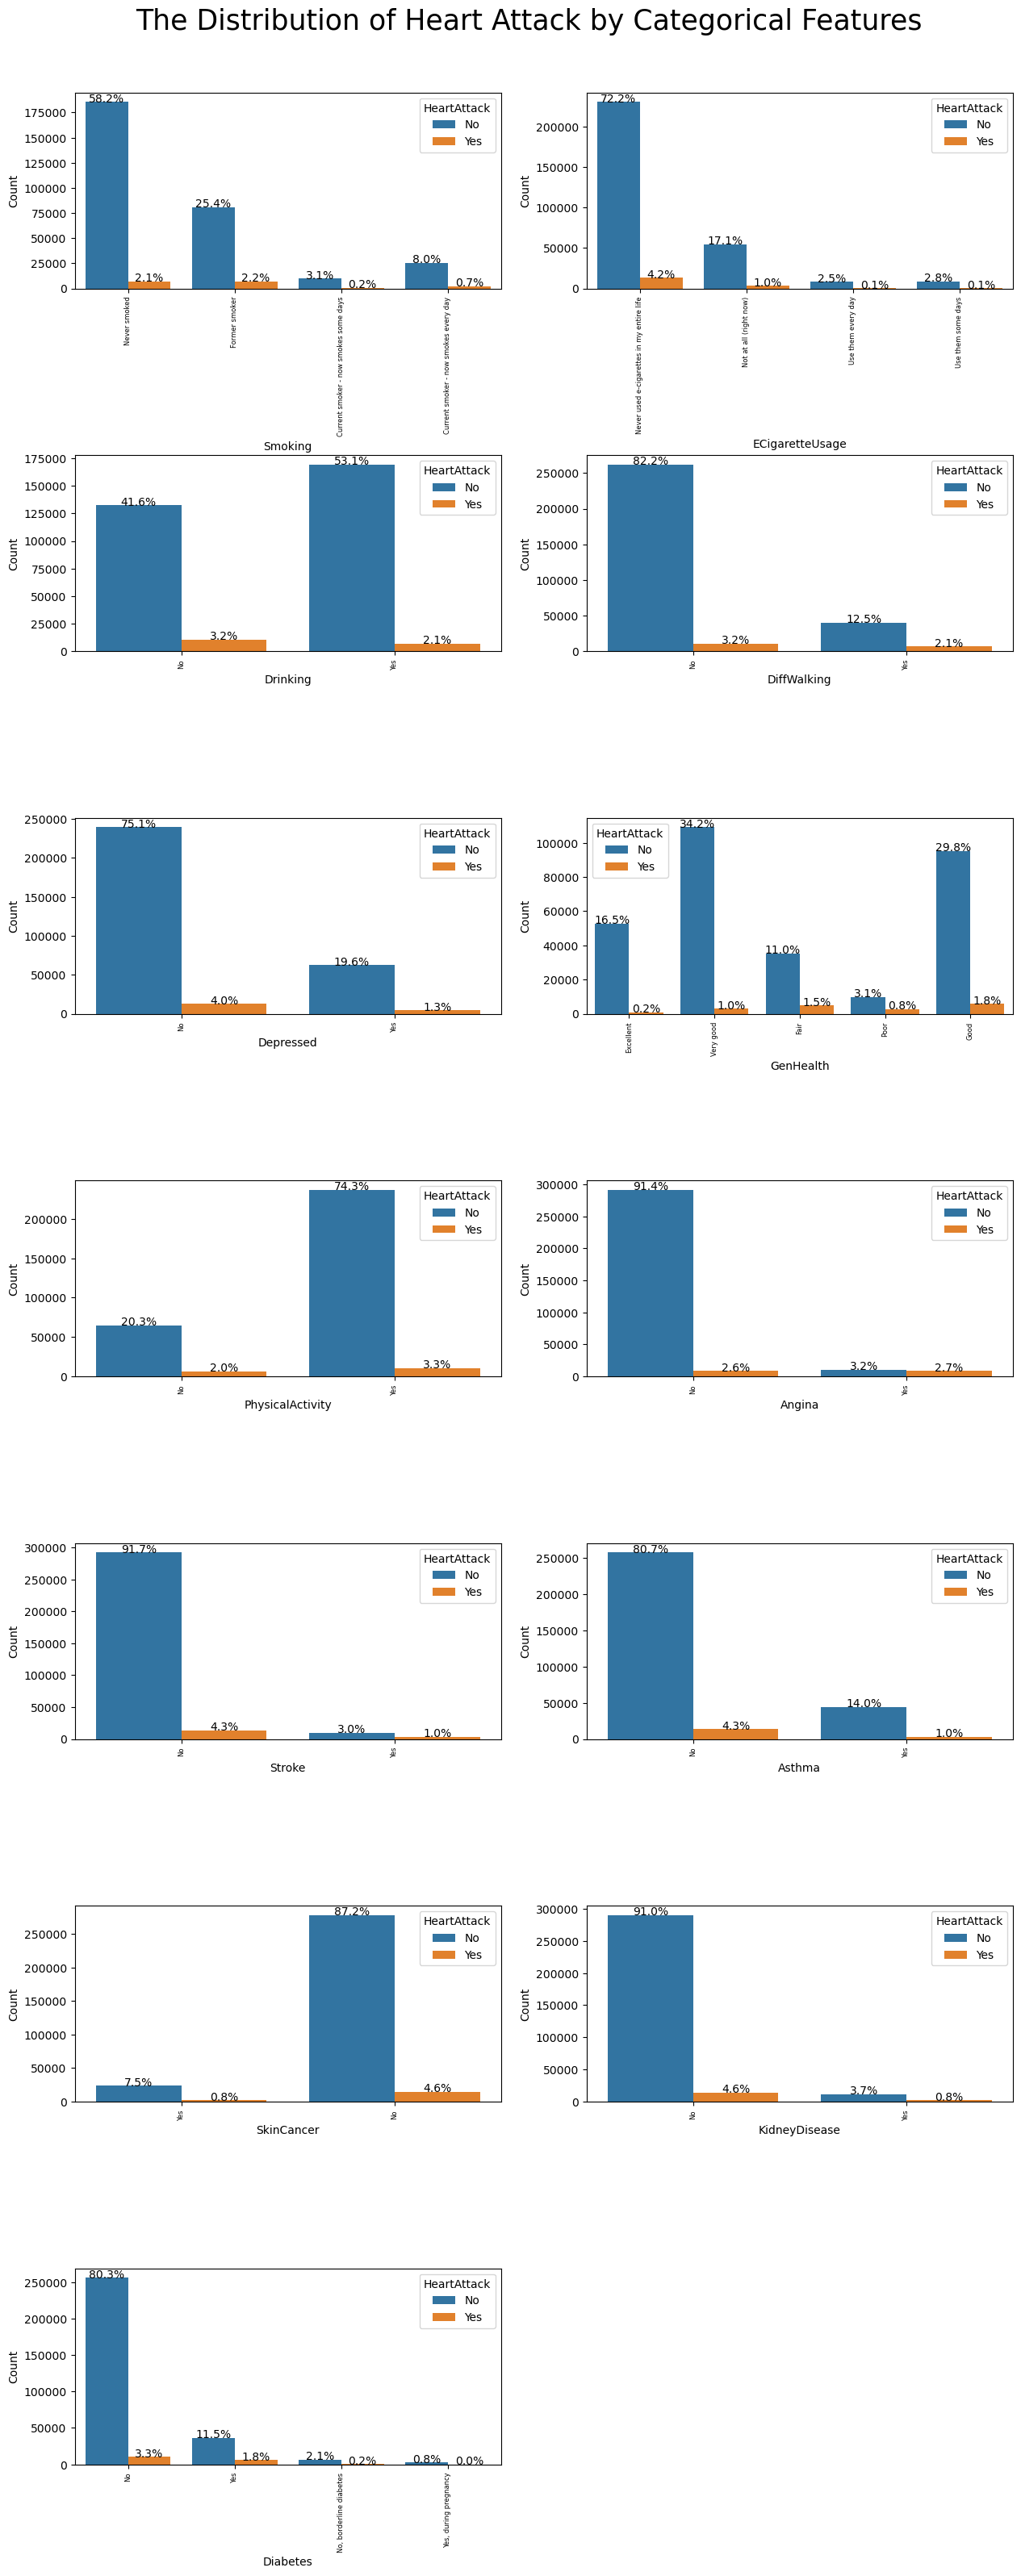

In [26]:
risk_cols = ['Smoking', 'ECigaretteUsage', 'Drinking', 'DiffWalking', 'Depressed', 
             'GenHealth', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma', 
             'SkinCancer', 'KidneyDisease', 'Diabetes'] 
# Determin the number of rows and columns
L = len(risk_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(risk_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, hue="HeartAttack", ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Heart Attack by Categorical Features', fontsize=25)
plt.show()

# 4. Data Processing

### 4.1. Convert Categorical Variables to Numerical Variables

In [28]:
# Copy Data Frame df1 to df2
df2 = df1.copy()

# Then, drop column named "State"
df2 = df2.drop("State", axis=1)

In [29]:
# Encoding the binary columns
df2["Sex"] = df2["Sex"].replace({"Male":0, "Female":1})
df2 = df2.replace({"No": 0, "Yes":1})

In [30]:
# Verify columns types after converting to numeric
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318934 entries, 0 to 318933
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318934 non-null  int64  
 1   Age               318934 non-null  object 
 2   Race              318934 non-null  object 
 3   BMI               318934 non-null  float64
 4   Height            318934 non-null  float64
 5   Weight            318934 non-null  float64
 6   GenHealth         318934 non-null  object 
 7   PhysicalHealth    318934 non-null  float64
 8   MentalHealth      318934 non-null  float64
 9   PhysicalActivity  318934 non-null  int64  
 10  ChestScan         318934 non-null  int64  
 11  SleepHours        318934 non-null  float64
 12  DiffWalking       318934 non-null  int64  
 13  Smoking           318934 non-null  object 
 14  ECigaretteUsage   318934 non-null  object 
 15  Drinking          318934 non-null  int64  
 16  HeartAttack       31

* There are still some object types such as Age, Race, GenHealth, Smoking, ECigaretteUsage, Diabetes ==> Furthur encoding needed.

In [31]:
# Encoding "object" type variables

# Age 
age_mapping = {
    '18-24': 0, 
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df2["Age"] = df2["Age"].replace(age_mapping).astype(int)

# Race
race_mapping = {
    'White': 0, 
    'Black': 1,
    'Other': 2, 
    'Multiracial': 3, 
    'Hispanic': 4
}
df2["Race"] = df2["Race"].replace(race_mapping).astype(int)

# GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df2["GenHealth"] = df2["GenHealth"].replace(genhealth_mapping).astype(int)

# Smoking
smoking_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df2["Smoking"] = df2["Smoking"].replace(smoking_mapping).astype(int)

# ECigaretteUsage
ec_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them every day': 2,
    'Use them some days': 3
}
df2["ECigaretteUsage"] = df2["ECigaretteUsage"].replace(ec_mapping).astype(int)

# Diabetic 
diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 3,
    'Yes, during pregnancy': 4
}
df2["Diabetes"] = df2["Diabetes"].replace(diabetic_mapping).astype(int)

In [32]:
# Check columns' type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318934 entries, 0 to 318933
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318934 non-null  int64  
 1   Age               318934 non-null  int64  
 2   Race              318934 non-null  int64  
 3   BMI               318934 non-null  float64
 4   Height            318934 non-null  float64
 5   Weight            318934 non-null  float64
 6   GenHealth         318934 non-null  int64  
 7   PhysicalHealth    318934 non-null  float64
 8   MentalHealth      318934 non-null  float64
 9   PhysicalActivity  318934 non-null  int64  
 10  ChestScan         318934 non-null  int64  
 11  SleepHours        318934 non-null  float64
 12  DiffWalking       318934 non-null  int64  
 13  Smoking           318934 non-null  int64  
 14  ECigaretteUsage   318934 non-null  int64  
 15  Drinking          318934 non-null  int64  
 16  HeartAttack       31

### 4.2. Correlation Matrix

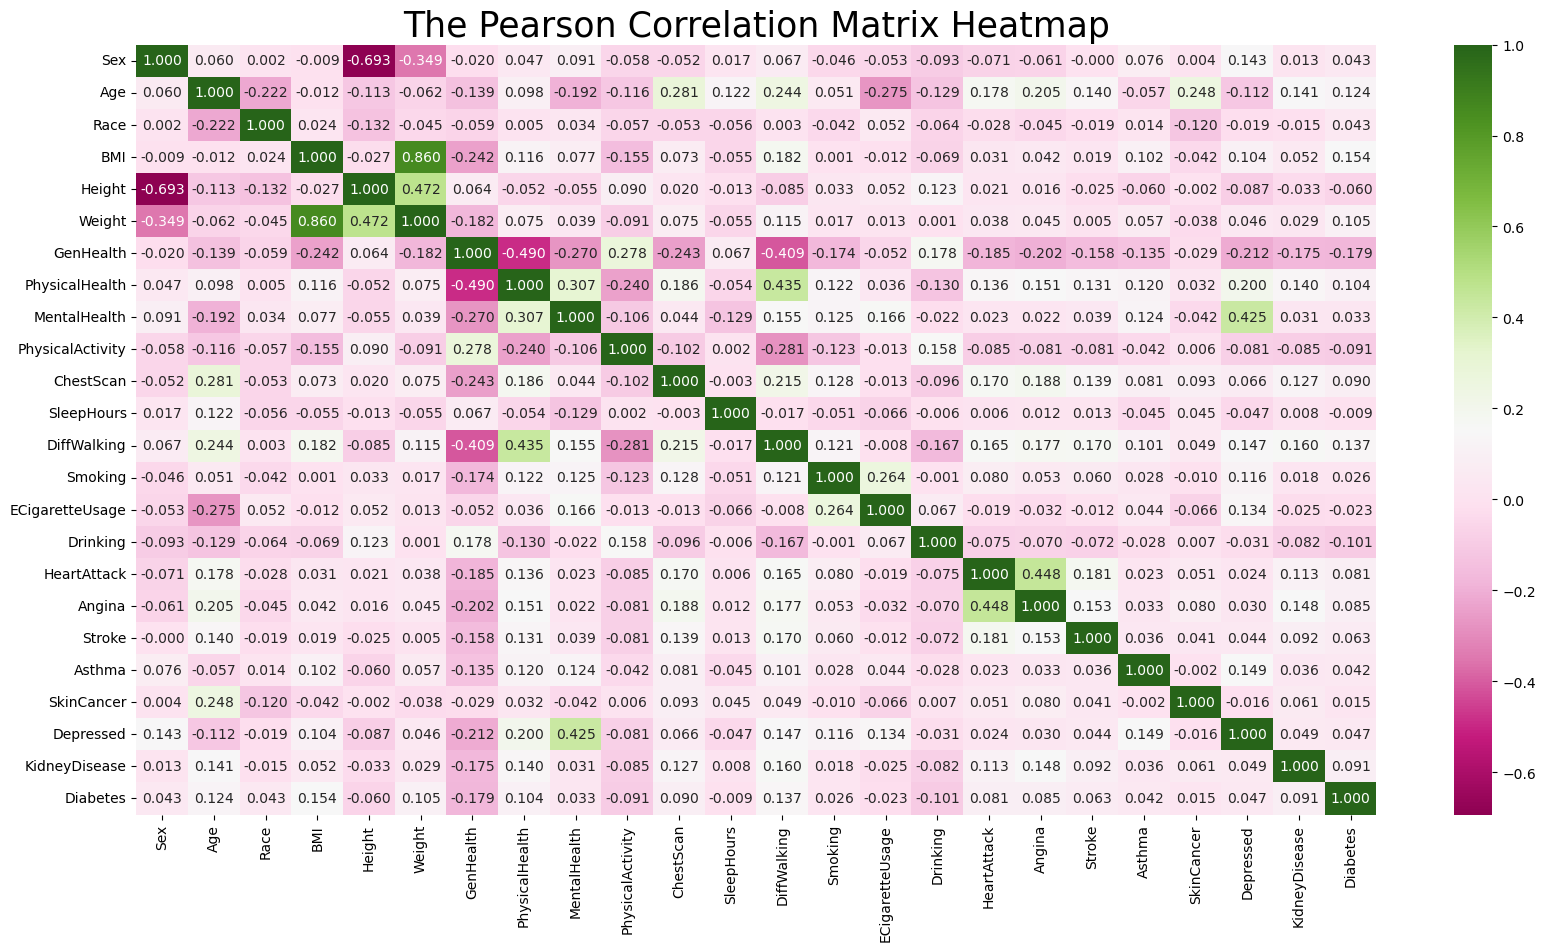

In [33]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("The Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

##### Export to CSV file for Machine Learning purposes

In [34]:
# Save to CSV
df2.to_csv("Resources/heart_2022_cleaned.csv", index=False)

# 5. Machine Learning